
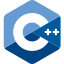
<br>

<div style="text-align:center; font-size:200%;">
 <b>Beispiel: Namen von Typen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 03 Beispiel Namen von Typen.ipynb -->
<!-- slides/module_400_templates/topic_200_type_name.cpp -->


- C++ hat keine guten Reflection-Fähigkeiten
  - Laufzeit-Informationen über Typen (RTTI) sind sehr begrenzt
  - Keine gute Möglichkeit, den Namen eines Typs zur Laufzeit zu ermitteln
  - Wert von `std::type_info::name()` ist nicht standardisiert
- Aber: Compiler kennt die Namen der Typen
  - Können wir den Compiler dazu bringen, uns diese Namen zur Verfügung zu stellen?

In [ ]:
#include <typeinfo>

In [ ]:
typeid(int).name()


## Idee: Template-Metaprogrammierung

- Funktion `type_name<T>()`
  - gibt den Namen des Typs `T` zurück
  - kann für benutzerdefinierte Typen erweitert werden


## Version 1: Direkte Implementierung

In [ ]:
#include <string>
#include <typeinfo>

In [ ]:
template <typename T>
std::string type_name_v1()
{
    std::string type_name{typeid(T).name()};
    if (type_name.find("class ") == 0) {
        type_name.erase(0, 6);
    }
    return type_name;
}


- Template-Spezialisierung für bestimmte Typen

In [ ]:
template <>
std::string type_name_v1<int>()
{
    return "int";
}

In [ ]:
type_name_v1<int>()

In [ ]:
type_name_v1<std::string>()

In [ ]:
type_name_v1<std::vector<int>>()


- Funktioniert, aber:
  - `type_name_v1<std::vector<int>>()` ist nicht sehr schön
  - Es ist schwierig einen passenden Overload zu definieren
  - Partielle Spezialisierung von Funktions-Templates ist nicht erlaubt

In [ ]:
// template <typename T>
// std::string type_name_v1<std::vector<T>>()
// {
//     return "std::vector<" + type_name_v1<T>() + ">";
// }


## Version 2: Type-Traits

- Im Gegensatz zu Funktionen können Klassen partiell spezialisiert werden
- Wir können also eine Klasse `TypeName` definieren, die den Namen eines Typs enthält
- Die Klasse `TypeName` kann dann partiell spezialisiert werden:

In [ ]:
template <typename T>
struct TypeName
{
    static std::string name()
    {
        std::string type_name{typeid(T).name()};
        if (type_name.find("class ") == 0) {
            type_name.erase(0, 6);
        }
        return type_name;
    }
};

In [ ]:
template <>
struct TypeName<int>
{
    static std::string name()
    {
        return "int";
    }
};

In [ ]:
template <>
struct TypeName<std::string>
{
    static std::string name()
    {
        return "std::string";
    }
};

In [ ]:
template <typename T>
struct TypeName<std::vector<T>>
{
    static std::string name()
    {
        return "std::vector<" + TypeName<T>::name() + ">";
    }
};

In [ ]:
TypeName<int>::name()

In [ ]:
TypeName<bool>::name()

In [ ]:
TypeName<std::string>::name()

In [ ]:
TypeName<std::vector<int>>::name()

In [ ]:
TypeName<std::vector<bool>>::name()

In [ ]:
TypeName<std::vector<std::vector<std::string>>>::name()


- Eine solche Struct nennen wir einen *Type-Trait*
- Wir können jetzt das Erzeugen des Type-Traits in eine Funktion auslagern:


- Im Header `type_name.hpp` finden Sie eine vollständigere Implementierung
- Der Header definiert auch zwei Macros
  - `DEFINE_TYPE_NAME(T)`, das die partielle Spezialisierung für `T`
    definiert
  - `DEFINE_TYPE_NAME_ALIAS(T, U)`, der eine partielle Spezialisierung für
    `T` definiert, die `U` als Namen verwendet
  - Um Namenskonflikte zu vermeiden, definiert die Version von
    `type_name.hpp`, die in diesem Notebook verwendet wird, den Trait
    `TypeName` im Namespace `tn`
  - Daher müssen die Macros auch in diesem Namespace aufgerufen werden

In [ ]:
#include "type_name.hpp"

In [ ]:
type_name<int>()

In [ ]:
struct MyStruct
{
    int x;
    std::string y;
};

In [ ]:
namespace tn {
using ::MyStruct;
DEFINE_TYPE_NAME(MyStruct);
}

In [ ]:
type_name<MyStruct>()

In [ ]:
type_name<const int&>()

In [ ]:
type_name<const int*>()

In [ ]:
type_name<int* const>()

In [ ]:
type_name<const int* const>()

In [ ]:
type_name<const std::vector<const MyStruct*>&>()